## 📘 What is Multicollinearity?

Multicollinearity occurs when **two or more independent variables are highly linearly correlated** with each other.  
In simple words:

**The features are repeating the same information.**

---

### ✔️ Simple Definition
Multicollinearity =  
"When one predictor variable can be almost perfectly predicted using another predictor variable."

---

### 🧠 Mathematical Expression
If:

$$
X_2 = aX_1 + b
$$

Then X1 and X2 have **multicollinearity**,  
because X2’s behavior can be fully explained by X1.

---

### 📈 How to Detect?
- Correlation matrix  
- VIF (Variance Inflation Factor)  
- Pairwise feature relationships  

---

### 🎯 Why it matters?
- Prediction usually stays unaffected  
- But **inference becomes unreliable**  
- Coefficients become unstable  
- p-values become misleading  
- Model cannot understand which feature is actually important  




In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [18]:
data = pd.read_csv('clean_data.csv')

In [19]:
data.head()

,total_sqft,bath,balcony,price,size_in_bhk
0,1056.0,2.0,1.0,39.07,2.0
1,2600.0,5.0,3.0,120.00,4.0
2,1440.0,2.0,3.0,62.00,3.0
3,1521.0,3.0,1.0,95.00,3.0
4,1200.0,2.0,1.0,51.00,2.0


### 📝 Example
If in a dataset:

- `bath`
- `size_in_bhk`

have a correlation of **0.82**,  
that is **strong multicollinearity**,  
because as BHK increases, bathrooms also increase.

<Axes: >

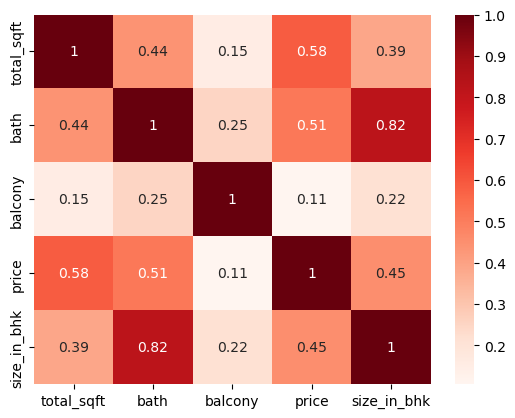

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')

### Interpretation

The VIF values clearly show that the dataset has strong multicollinearity. 
The features `bath` and `size_in_bhk` have extremely high VIF scores, which means these variables are largely explained by other predictors and do not contribute independent information. Such highly correlated predictors make the regression coefficients unstable and reduce the reliability of the model.

On the other hand, `total_sqft` and `balcony` have VIF values within an acceptable range, indicating that they do not create harmful multicollinearity and can be safely used in the model.



In [21]:
X2 = data.drop(columns=['price'])
vif = pd.DataFrame()
vif["feature"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

,feature,VIF
0,total_sqft,3.481040
1,bath,28.720527
2,balcony,4.678485
3,size_in_bhk,26.923376


In [22]:
data.head()

,total_sqft,bath,balcony,price,size_in_bhk
0,1056.0,2.0,1.0,39.07,2.0
1,2600.0,5.0,3.0,120.00,4.0
2,1440.0,2.0,3.0,62.00,3.0
3,1521.0,3.0,1.0,95.00,3.0
4,1200.0,2.0,1.0,51.00,2.0


## 📘 Why Multicollinearity Does NOT Affect Prediction

Assume we have two predictors `x1` and `x2` and both are highly correlated.

This means:

$$
x_1 = a_0 + a_1 x_2
$$

So `x1` can be *almost fully explained* using `x2`.

---

## 📌 Substitute this into the linear regression prediction equation

Original model:

$$
\hat{y} = b_0 + b_1 x_1 + b_2 x_2
$$

Since:

$$
x_1 = a_0 + a_1 x_2
$$

Substitute x1:

$$
\hat{y} = b_0 + b_1(a_0 + a_1 x_2) + b_2 x_2
$$

---

## 📌 Simplify the equation

Expand:

$$
\hat{y} = b_0 + b_1 a_0 + b_1 a_1 x_2 + b_2 x_2
$$

Group x2 terms:

$$
\hat{y} = (b_0 + b_1 a_0) + (b_1 a_1 + b_2)x_2
$$

---

## 🎯 Final Form (Important)

$$
\hat{y} = C_0 + C_1 x_2
$$

Where:

- \( C_0 = b_0 + b_1 a_0 \)  
- \( C_1 = b_1 a_1 + b_2 \)

---

## 🧠 Key Insight

Even though the model had **two predictors** (x1 and x2),  
**after substitution the prediction depends on x2 only**.

This means:

> **The model is actually using the same information twice, but prediction remains correct because the combined effect stays stable.**

So multicollinearity does **not** harm prediction.

---

## ✅ Summary

- When x1 and x2 are highly correlated,  
  x1 can be rewritten in terms of x2  
- Substituting this into the prediction formula shows  
  that the model uses a *single combined signal*  
- Coefficients may change, but  
  **predicted output stays the same**

Therefore:

### 🔵 Multicollinearity does NOT affect prediction accuracy.



In [23]:
## 🧪 Code Demonstration
X = data.drop(columns=['price'])
y= data['price']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
# with multicollinearity
print("RMSE", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))     
print("R2", r2_score(y_test, model.predict(x_test)))

RMSE 90.55379232405967
R2 0.4518209662567937


In [28]:
X = data.drop(columns=['price', 'bath'])
y= data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# without multicollinearity
print("RMSE", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))     
print("R2", r2_score(y_test, model.predict(x_test)))

RMSE 91.38878618181928
R2 0.44166487110263153


## 🟦 Conclusion: Why Removing a Correlated Feature Reduced Performance

After comparing the models **with** multicollinearity and **after removing a correlated feature (`bath`)**, we observed:

- **RMSE (with multicollinearity):** 90.55  
- **RMSE (without multicollinearity):** 91.38  
- **R² (with multicollinearity):** 0.4518  
- **R² (without multicollinearity):** 0.4416  

The performance actually **got worse** after removing the correlated feature.

---

### ✔️ Key Insight

Although `bath` is correlated with other features (like `BHK`),  
it still carries **useful information** about the target variable (`price`).  
So when we removed it:

- The model **lost an important predictor**  
- The overall explanatory power **decreased**  
- This caused **RMSE to increase** and **R² to decrease**

This means multicollinearity **was not harming prediction**.  
Instead, removing a meaningful feature reduced the model’s accuracy.

---

### 🔵 Final Conclusion

**Multicollinearity does NOT always affect prediction accuracy.**  
In this dataset:

- Correlated features were still providing important information  
- Removing the `bath` variable caused performance to drop  
- Therefore, prediction became worse after removing a correlated feature  

**Multicollinearity mainly affects inference (coefficient stability, p-values),  
not prediction performance.**


---
### Why Inference Becomes Problematic Under Multicollinearity

When predictors are strongly correlated with each other, the model loses its ability to determine how much each individual feature actually contributes to the output. As a result, the regression coefficients become unstable and highly sensitive to small variations in the data.

Because of this instability, two major issues appear:

1. **Unreliable Coefficients:**  
   The model cannot assign consistent weights to correlated predictors. Even a small change in the dataset can cause large fluctuations in the coefficients, sometimes even flipping their signs. This makes interpretation meaningless.

2. **Inflated Variance:**  
   Multicollinearity increases the variance of the estimated coefficients. Higher variance means wider confidence intervals, weaker statistical significance, and reduced trust in the model’s explanations.

Due to these effects, inference becomes difficult because the model no longer provides a clear, dependable relationship between each predictor and the target variable. The presence of redundant predictors hides the true signal and makes interpretation misleading.


In [ ]:
# Features with multicollinearity
features = ["total_sqft", "bath", "balcony", "size_in_bhk"]

X = data[features]
y = data["price"]

# 1) Model on full data
model_full = LinearRegression()
model_full.fit(X, y)

coef_full = pd.Series(model_full.coef_, index=features)
r2_full = r2_score(y, model_full.predict(X))

print("Coefficients on full data:")
print(coef_full)
print("\nR2 on full data:", r2_full)

# 2) Slightly changed data: drop 10% random rows
data_small = data.sample(frac=0.9, random_state=42)

X_small = data_small[features]
y_small = data_small["price"]

model_small = LinearRegression()
model_small.fit(X_small, y_small)

coef_small = pd.Series(model_small.coef_, index=features)
r2_small = r2_score(y_small, model_small.predict(X_small))

print("\nCoefficients after dropping 10% of rows:")
print(coef_small)
print("\nR2 after dropping 10% of rows:", r2_small)

# Compare side by side
coef_compare = pd.DataFrame({
    "coef_full": coef_full,
    "coef_dropped_10%": coef_small
})
print("\nCoefficient comparison:")
print(coef_compare)


Coefficients on full data:
total_sqft      0.050835
bath           39.977825
balcony        -7.308301
size_in_bhk     8.461918
dtype: float64

R2 on full data: 0.42532248913924053

Coefficients after dropping 10% of rows:
total_sqft      0.051899
bath           38.591653
balcony        -7.659453
size_in_bhk     9.337113
dtype: float64

R2 after dropping 10% of rows: 0.42668505813502167

Coefficient comparison:
             coef_full  coef_dropped_10%
total_sqft    0.050835          0.051899
bath         39.977825         38.591653
balcony      -7.308301         -7.659453
size_in_bhk   8.461918          9.337113


### Why Coefficients Look Large, and Why the Real Problem Is Instability

Some coefficients appear large simply because the features themselves use 
large numerical scales. For example, increasing `bath` or `size_in_bhk` by 
1 unit represents a major structural change in a house, whereas increasing 
`total_sqft` by 1 square foot is a very small change. Because of these scale 
differences, the model naturally assigns larger coefficients to certain 
features. This is normal and does not, by itself, indicate multicollinearity.

The real problem shows up when the coefficients change noticeably even though 
the model’s R² score stays almost the same. In a stable model, removing or 
changing a small portion of the data should barely affect the coefficients. 
However, here:

- `size_in_bhk` shifts by more than 10%
- `bath` and `balcony` also show noticeable movement
- `total_sqft` moves slightly despite tiny changes in R²

This mismatch — large coefficient movement with almost no change in R² — 
proves that the model is unstable. The model is redistributing weight between 
correlated variables because they contain overlapping information.

This instability, not the size of the coefficients, is the true sign of 
multicollinearity.


---
### Why Multicollinearity Makes Coefficients Large (Matrix Reason)

In linear regression, the coefficient vector is computed using the formula:

$$
\beta = (X^T X)^{-1} X^T y
$$

To understand why coefficients become large, recall that the inverse of a 
matrix can be written as:

$$
(X^T X)^{-1} = \frac{\text{adj}(X^T X)}{\det(X^T X)}
$$

When multicollinearity is present, the columns of \(X\) become nearly 
linearly dependent. This makes the matrix \(X^T X\) **close to singular**, 
which means its determinant becomes **very small**:

$$
\det(X^T X) \approx 0
$$

As a result, the denominator in the inverse becomes extremely small, while 
the adjoint matrix in the numerator stays at a normal scale. Dividing a 
normal-sized numerator by a very small denominator produces **very large 
values**:

$$
\beta = \frac{\text{adj}(X^T X)}{\det(X^T X)} X^T y
$$

Therefore, even small numerical noise, sampling variation, or minor changes 
in the dataset cause large swings in the coefficient values. This explains 
why the coefficients appear unstable and sometimes explode in magnitude 
when multicollinearity is present.

In short:

- Near-linear dependence ⟹  
  \( \det(X^T X) \to 0 \)

- Small determinant ⟹  
  \( (X^T X)^{-1} \) becomes huge

- Huge inverse ⟹  
  coefficients \( \beta \) become large and unstable

This matrix-level explanation shows exactly why multicollinearity damages 
inference.
